# Machine Learning for Level Truncation in Open String Field Theory

Harold Erbin, Riccardo Finotello, Matej Kudrna, Martin Schnabl

---
---

## Abstract

In the framework of bosonic Open String Field Theory (OSFT), we consider several observables characterised by conformal weight and type, and the position of vacua in the potential for various values of truncated mass level. We focus on the prediction of the extrapolated value for the level-$\infty$ truncation using Machine Learning (ML) techniques.

In this notebook we focus on tidying the dataset of the $\mathrm{SU}(2)$ WZW model and preparing it for the analysis.

In [ ]:
%load_ext autoreload
%autoreload 2

## Load the Dataset

We first load the dataset and take a look at its properties before tidying its entries:

In [2]:
import pandas as pd

# load separately the real and imaginary parts
df_re = pd.read_json('./data/data_wzw_re.json')
df_im = pd.read_json('./data/data_wzw_im.json')

The two datasets represent different variables of the same original data: one of them contains all the real parts of the variables, while the other contains only the imaginary parts.

In [3]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   k       46 non-null     object
 1   exp     46 non-null     object
 2   weight  46 non-null     object
 3   j       46 non-null     object
 4   m       46 non-null     object
 5   type    46 non-null     object
 6   2       46 non-null     object
 7   3       46 non-null     object
 8   4       46 non-null     object
 9   5       46 non-null     object
 10  6       46 non-null     object
 11  7       46 non-null     object
 12  8       46 non-null     object
 13  9       46 non-null     object
 14  10      46 non-null     object
 15  11      15 non-null     object
 16  12      2 non-null      object
 17  13      1 non-null      object
 18  14      1 non-null      object
dtypes: object(19)
memory usage: 7.0+ KB


In [4]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   k       46 non-null     object
 1   exp     46 non-null     object
 2   weight  46 non-null     object
 3   j       46 non-null     object
 4   m       46 non-null     object
 5   type    46 non-null     object
 6   2       46 non-null     object
 7   3       46 non-null     object
 8   4       46 non-null     object
 9   5       46 non-null     object
 10  6       46 non-null     object
 11  7       46 non-null     object
 12  8       46 non-null     object
 13  9       46 non-null     object
 14  10      46 non-null     object
 15  11      15 non-null     object
 16  12      2 non-null      object
 17  13      1 non-null      object
 18  14      1 non-null      object
dtypes: object(19)
memory usage: 7.0+ KB


In general all entries are vector-like and should be expanded over the entries in the tidy dataset.
We also rename the columns in the datasets to be recognizable as real and imaginary part (whenever we encounter entire columns which are completely vanishing, we can discard it).

Some of the truncation levels are also almost empy (i.e. have NaN values): since their in general less than half of the complete entries, we discard them.

In [5]:
# discard mostly empty variables
df_re = df_re.drop(columns=['11', '12', '13', '14'])
df_im = df_im.drop(columns=['11', '12', '13', '14'])

We rename the variables according to their definition. The fact that they hold the real and imaginary part of the variable will be handled later when merging the datasets:

In [6]:
import re

# rename the variables
col_rename = lambda s: re.sub(r'^([0-9]*)$', r'level_\1', s)

df_re = df_re.rename(columns=col_rename)
df_im = df_im.rename(columns=col_rename)

Each dataset contains solutions which have very different lengths as we can see by plotting their counts:

In [7]:
INPUT = './data/data_wzw_re_tmp.json'
OUTPUT = 're_sol_length'

df_re.to_json(INPUT, orient='split', index=False)

!python3 ./scripts/sol-length.py --input {INPUT} --output {OUTPUT}

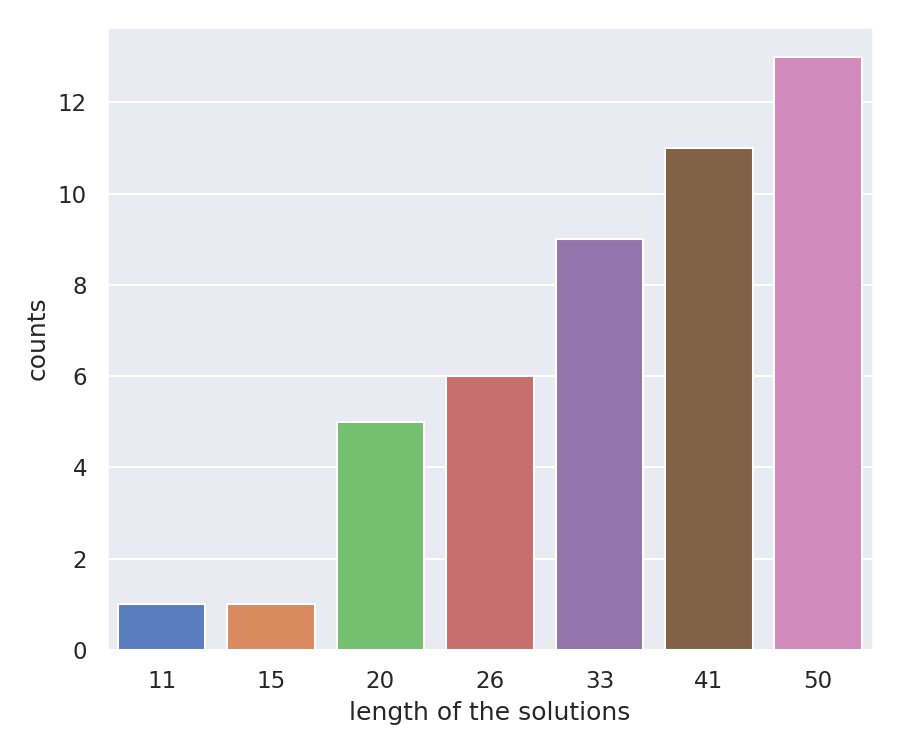

In [8]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

In [9]:
INPUT = './data/data_wzw_im_tmp.json'
OUTPUT = 're_sol_length'

df_im.to_json(INPUT, orient='split', index=False)

!python3 ./scripts/sol-length.py --input {INPUT} --output {OUTPUT}

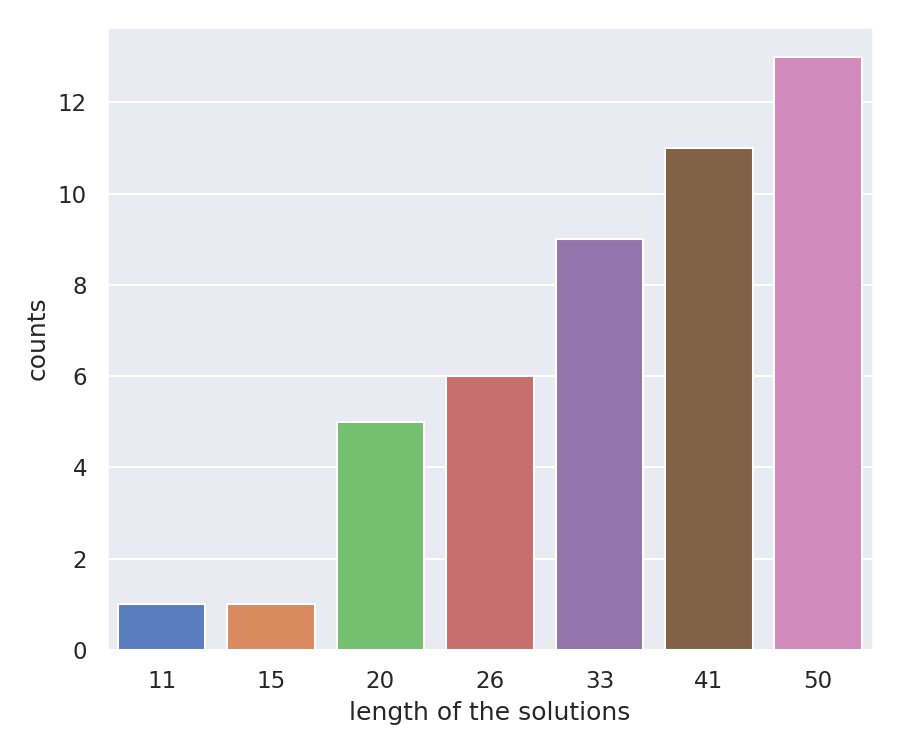

In [10]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

NB: plotting the counts of both datasets is just a check: they should contain the same number of solutions.

## Tidy the Dataset

We then proceed with tidying the dataset for the analysis. In particular we need to flatten each vector entry over the rows to have all numeric entries for comparison.

In [11]:
import numpy  as np
import pandas as pd

# load the dataset and apply the transformations
df_re     = pd.read_json('./data/data_wzw_re_tmp.json', orient='split')
df_im     = pd.read_json('./data/data_wzw_im_tmp.json', orient='split')
shapes_re = df_re.applymap(len)
shapes_re = shapes_re.apply(lambda x: np.unique(x).squeeze(), axis=1)
shapes_im = df_im.applymap(len)
shapes_im = shapes_im.apply(lambda x: np.unique(x).squeeze(), axis=1)

In [12]:
# stack each vector on top of each other
df_re = pd.concat([pd.DataFrame({f: df_re[f].iloc[n] for f in df_re})
                  for n in range(df_re.shape[0]) 
                  ],
                  axis=0,
                  ignore_index=True
                 )
df_im = pd.concat([pd.DataFrame({f: df_im[f].iloc[n] for f in df_im})
                  for n in range(df_im.shape[0]) 
                  ],
                  axis=0,
                  ignore_index=True
                 )

assert df_re.shape == df_im.shape

We now have two separate datasets which have been flattened over the rows and contain only numeric entries and are complete:

In [13]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   k         1680 non-null   float64
 1   exp       1680 non-null   float64
 2   weight    1680 non-null   float64
 3   j         1680 non-null   float64
 4   m         1680 non-null   float64
 5   type      1680 non-null   float64
 6   level_2   1680 non-null   float64
 7   level_3   1680 non-null   float64
 8   level_4   1680 non-null   float64
 9   level_5   1680 non-null   float64
 10  level_6   1680 non-null   float64
 11  level_7   1680 non-null   float64
 12  level_8   1680 non-null   float64
 13  level_9   1680 non-null   float64
 14  level_10  1680 non-null   float64
dtypes: float64(15)
memory usage: 197.0 KB


In [14]:
df_re.describe()

,k,exp,weight,j,m,type,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,6.777381,0.038664,0.904315,1.971429,0.000000,3.890476,-0.077024,-0.079294,0.089836,0.078986,-0.011237,-0.003376,0.075769,0.069030,-0.008013
std,1.314858,0.594829,0.588936,1.263905,1.576801,0.455165,2.614227,2.648262,1.286826,1.317507,1.384471,1.436868,1.518934,1.578406,1.722916
min,2.000000,-1.519671,0.000000,0.000000,-4.000000,2.000000,-26.284377,-26.284377,-8.757038,-9.252983,-10.978029,-11.445648,-13.721069,-14.249796,-24.994666
25%,6.000000,-0.437426,0.416667,1.000000,-1.000000,4.000000,-0.570279,-0.601505,-0.487621,-0.460953,-0.530362,-0.535451,-0.494487,-0.482390,-0.485126
50%,7.000000,0.000000,0.972222,2.000000,0.000000,4.000000,0.000000,0.000000,0.018674,0.016188,0.000000,0.000000,0.008034,0.006125,0.000000
75%,8.000000,0.500705,1.333333,3.000000,1.000000,4.000000,0.586592,0.619976,0.611741,0.585377,0.536852,0.556819,0.597575,0.589435,0.506648
max,8.000000,1.414214,2.000000,4.000000,4.000000,4.000000,35.385221,35.385221,11.673646,11.673646,10.978029,11.445648,18.673134,20.051284,15.315423


In [15]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   k         1680 non-null   float64
 1   exp       1680 non-null   float64
 2   weight    1680 non-null   float64
 3   j         1680 non-null   float64
 4   m         1680 non-null   float64
 5   type      1680 non-null   float64
 6   level_2   1680 non-null   float64
 7   level_3   1680 non-null   float64
 8   level_4   1680 non-null   float64
 9   level_5   1680 non-null   float64
 10  level_6   1680 non-null   float64
 11  level_7   1680 non-null   float64
 12  level_8   1680 non-null   float64
 13  level_9   1680 non-null   float64
 14  level_10  1680 non-null   float64
dtypes: float64(15)
memory usage: 197.0 KB


In [16]:
df_im.describe()

,k,exp,weight,j,m,type,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
count,1680.0,1680.000000,1680.0,1680.0,1680.0,1680.0,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,0.0,-0.001853,0.0,0.0,0.0,0.0,-0.005670,-0.009452,-0.001553,0.003396,-0.001987,-0.014919,-0.010940,0.009722,0.006753
std,0.0,0.298647,0.0,0.0,0.0,0.0,0.234921,0.371899,0.352832,0.353773,0.368500,0.443906,0.471528,0.623249,0.657285
min,0.0,-0.930605,0.0,0.0,0.0,0.0,-1.867961,-1.969113,-1.930349,-2.005075,-2.287981,-3.646223,-4.023181,-6.650984,-7.174097
25%,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.930605,0.0,0.0,0.0,0.0,1.867961,1.736677,1.930349,2.005075,2.287981,3.646223,4.023181,6.683011,7.187127


Finally we can merge the datasets (and add a suffix distinguishing between real and imaginary part):

In [17]:
df = pd.merge(df_re, df_im, left_index=True, right_index=True, suffixes=('_re', '_im'))
print('Fraction of NaN entries: {:.2f}'.format(df.isna().mean().sum()))
print('No. of rows:    {:d}'.format(df.shape[0]))
print('No. of columns: {:d}'.format(df.shape[1]))

Fraction of NaN entries: 0.00
No. of rows:    1680
No. of columns: 30


We can finally reorder the columns:

In [18]:
re_col = df_re.columns.tolist()
im_col = df_im.columns.tolist()

# insert the columns (NB [n:m:k] == 'start from n, go to m with step k')
columns       = [''] * (len(re_col) + len(im_col))
columns[0::2] = [s + '_re' for s in re_col]
columns[1::2] = [s + '_im' for s in im_col]

df = df[columns]

In [19]:
df.describe()

,k_re,k_im,exp_re,exp_im,weight_re,weight_im,j_re,j_im,m_re,m_im,...,level_6_re,level_6_im,level_7_re,level_7_im,level_8_re,level_8_im,level_9_re,level_9_im,level_10_re,level_10_im
count,1680.000000,1680.0,1680.000000,1680.000000,1680.000000,1680.0,1680.000000,1680.0,1680.000000,1680.0,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,6.777381,0.0,0.038664,-0.001853,0.904315,0.0,1.971429,0.0,0.000000,0.0,...,-0.011237,-0.001987,-0.003376,-0.014919,0.075769,-0.010940,0.069030,0.009722,-0.008013,0.006753
std,1.314858,0.0,0.594829,0.298647,0.588936,0.0,1.263905,0.0,1.576801,0.0,...,1.384471,0.368500,1.436868,0.443906,1.518934,0.471528,1.578406,0.623249,1.722916,0.657285
min,2.000000,0.0,-1.519671,-0.930605,0.000000,0.0,0.000000,0.0,-4.000000,0.0,...,-10.978029,-2.287981,-11.445648,-3.646223,-13.721069,-4.023181,-14.249796,-6.650984,-24.994666,-7.174097
25%,6.000000,0.0,-0.437426,0.000000,0.416667,0.0,1.000000,0.0,-1.000000,0.0,...,-0.530362,0.000000,-0.535451,0.000000,-0.494487,0.000000,-0.482390,0.000000,-0.485126,0.000000
50%,7.000000,0.0,0.000000,0.000000,0.972222,0.0,2.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.008034,0.000000,0.006125,0.000000,0.000000,0.000000
75%,8.000000,0.0,0.500705,0.000000,1.333333,0.0,3.000000,0.0,1.000000,0.0,...,0.536852,0.000000,0.556819,0.000000,0.597575,0.000000,0.589435,0.000000,0.506648,0.000000
max,8.000000,0.0,1.414214,0.930605,2.000000,0.0,4.000000,0.0,4.000000,0.0,...,10.978029,2.287981,11.445648,3.646223,18.673134,4.023181,20.051284,6.683011,15.315423,7.187127


We then remove the columns which are all identically vanishing (i.e. columns which have `mean` $=0$ and `std` $=0$):

In [20]:
vanishing = (df.mean() == 0.0) & (df.std() == 0.0)
vanishing = [c for c in columns if vanishing[c] == True]
vanishing

['k_im', 'weight_im', 'j_im', 'm_im', 'type_im']

In [21]:
df = df.drop(columns=vanishing)
df.describe()

,k_re,exp_re,exp_im,weight_re,j_re,m_re,type_re,level_2_re,level_2_im,level_3_re,...,level_6_re,level_6_im,level_7_re,level_7_im,level_8_re,level_8_im,level_9_re,level_9_im,level_10_re,level_10_im
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,6.777381,0.038664,-0.001853,0.904315,1.971429,0.000000,3.890476,-0.077024,-0.005670,-0.079294,...,-0.011237,-0.001987,-0.003376,-0.014919,0.075769,-0.010940,0.069030,0.009722,-0.008013,0.006753
std,1.314858,0.594829,0.298647,0.588936,1.263905,1.576801,0.455165,2.614227,0.234921,2.648262,...,1.384471,0.368500,1.436868,0.443906,1.518934,0.471528,1.578406,0.623249,1.722916,0.657285
min,2.000000,-1.519671,-0.930605,0.000000,0.000000,-4.000000,2.000000,-26.284377,-1.867961,-26.284377,...,-10.978029,-2.287981,-11.445648,-3.646223,-13.721069,-4.023181,-14.249796,-6.650984,-24.994666,-7.174097
25%,6.000000,-0.437426,0.000000,0.416667,1.000000,-1.000000,4.000000,-0.570279,0.000000,-0.601505,...,-0.530362,0.000000,-0.535451,0.000000,-0.494487,0.000000,-0.482390,0.000000,-0.485126,0.000000
50%,7.000000,0.000000,0.000000,0.972222,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008034,0.000000,0.006125,0.000000,0.000000,0.000000
75%,8.000000,0.500705,0.000000,1.333333,3.000000,1.000000,4.000000,0.586592,0.000000,0.619976,...,0.536852,0.000000,0.556819,0.000000,0.597575,0.000000,0.589435,0.000000,0.506648,0.000000
max,8.000000,1.414214,0.930605,2.000000,4.000000,4.000000,4.000000,35.385221,1.867961,35.385221,...,10.978029,2.287981,11.445648,3.646223,18.673134,4.023181,20.051284,6.683011,15.315423,7.187127


Since some of the columns are in general real numbers, we can rename them to avoid having the suffix `_re` to labels the:

In [22]:
import re

sub = [re.sub(r'(.*)_im', r'\1_re', s) for s in vanishing]
rep = [re.sub(r'(.*)_.*', r'\1', s) for s in vanishing]

# rename the columns
df = df.rename(columns=dict(zip(sub, rep)))

Finally we save the dataset for the analysis:

In [23]:
df.to_csv('./data/data_wzw.csv', index=False)